In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data=pd.read_csv((r'C:\Users\91797\Data science\heart.csv'))

In [28]:
data.head(5)

,Age,Sex,Chest Pain Type,TRestBps,cholestrol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                303 non-null int64
Sex                303 non-null int64
Chest Pain Type    303 non-null int64
TRestBps           303 non-null int64
cholestrol         303 non-null int64
FBS                303 non-null int64
RestECG            303 non-null int64
Thalach            303 non-null int64
Exang              303 non-null int64
Oldpeak            303 non-null float64
Slope              303 non-null int64
CA                 303 non-null int64
Thal               303 non-null int64
Target             303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [40]:
#Checking for null values
(data.isnull().sum() / len(data)).sort_values(ascending=False)

Target             0.0
Thal               0.0
CA                 0.0
Slope              0.0
Oldpeak            0.0
Exang              0.0
Thalach            0.0
RestECG            0.0
FBS                0.0
cholestrol         0.0
TRestBps           0.0
Chest Pain Type    0.0
Sex                0.0
Age                0.0
dtype: float64

In [30]:
#TO find the percentage of the missing values in the columns
(data.isnull().sum() / len(data)).sort_values(ascending=False)

Target             0.0
Thal               0.0
CA                 0.0
Slope              0.0
Oldpeak            0.0
Exang              0.0
Thalach            0.0
RestECG            0.0
FBS                0.0
cholestrol         0.0
TRestBps           0.0
Chest Pain Type    0.0
Sex                0.0
Age                0.0
dtype: float64

In [31]:
zero_not_accepted = ['TRestBps','cholestrol','Thalach']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [32]:
X = data.iloc[:,0:13]
y = data.iloc[:,13]

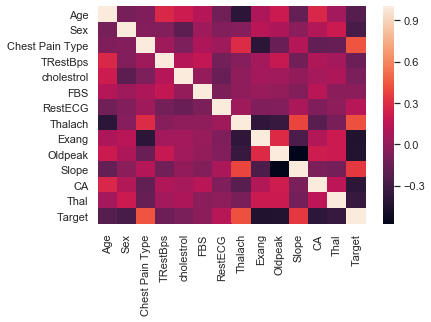

In [33]:
sns.heatmap(data.corr())

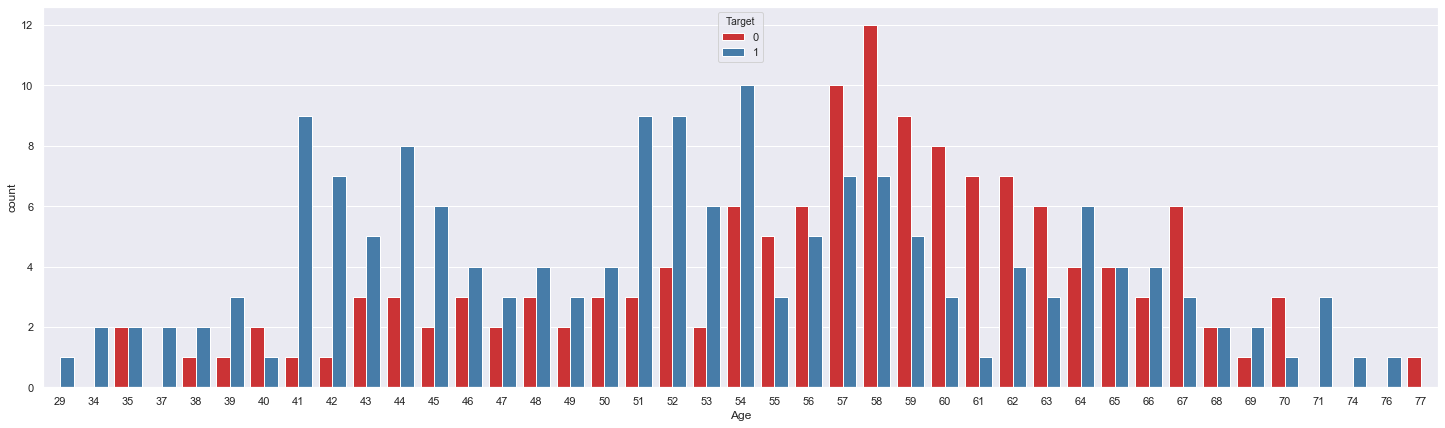

In [34]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Target',data=data,palette='Set1')

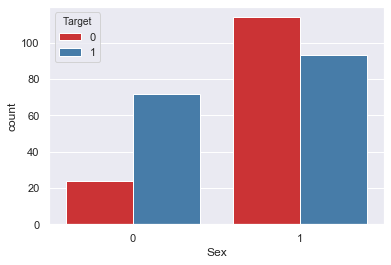

In [35]:
sns.countplot(x='Sex',hue='Target',data=data,palette='Set1')

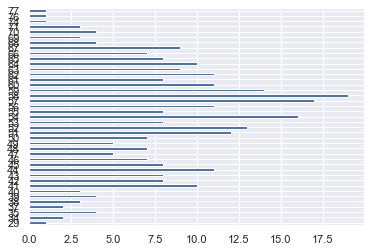

In [36]:
data['Age'].value_counts().sort_index().plot.barh()

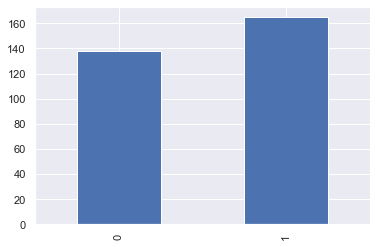

In [37]:
data['Target'].value_counts().sort_index().plot.bar()

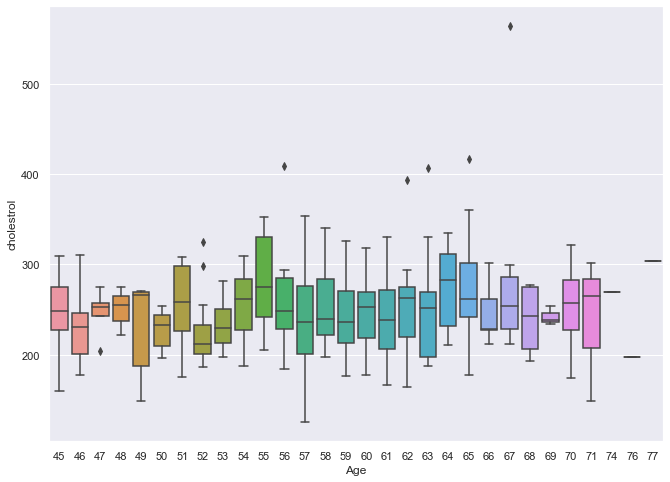

In [38]:
bxplot = data[(data['Age']>=45) & (data['cholestrol']>2)]
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot('Age', 'cholestrol', data=bxplot)

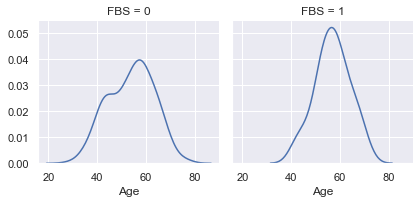

In [48]:
g = sns.FacetGrid(data, col='FBS')
g = g.map(sns.kdeplot, 'Age')

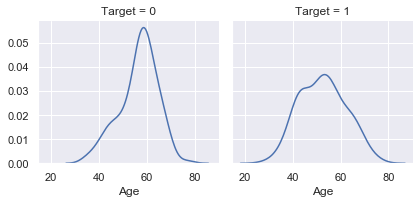

In [49]:
g = sns.FacetGrid(data, col='Target')
g = g.map(sns.kdeplot, 'Age')

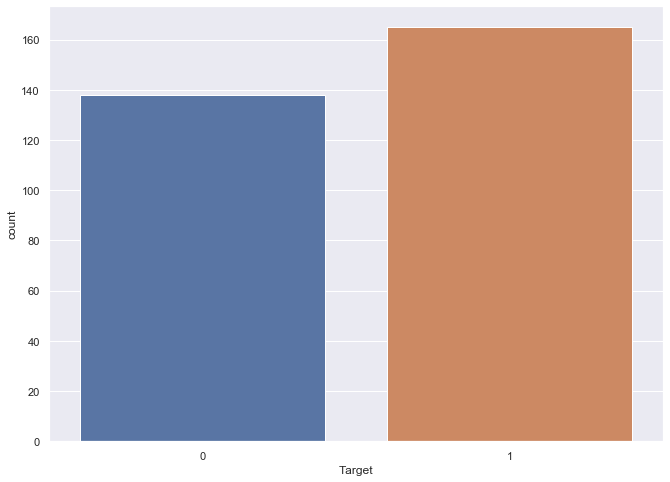

In [50]:
sns.countplot(data['Target'])

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
classifier = KNeighborsClassifier(n_neighbors=17,p=2,metric='euclidean')

In [42]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [45]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[20  7]
 [ 3 31]]
0.861111111111111


In [47]:
print(accuracy_score(y_test,y_pred)*100)

83.60655737704919
